In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Basic statistics
def analyze_requests(df):
    print("Total Requests:", len(df))
    print("Unique Sessions:", df['Session_ID'].nunique())
    print("Categories:", df['category'].value_counts())

# Compare humans vs bots
def compare_humans_bots(df):
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df = df.sort_values(by=['Session_ID', 'datetime'])
    human_df = df[df['category'] == 'humans']
    bot_df = df[df['category'] == 'bots']
    
    print("\nAverage Requests per Session:")
    print("Humans:", human_df.groupby('Session_ID').size().mean())
    print("Bots:", bot_df.groupby('Session_ID').size().mean())

    print("\nAverage Duration Between Requests:")
    human_time_diff = []
    for _, group in human_df.groupby('Session_ID'):
        time_diff = group['datetime'].diff().dropna()  
        human_time_diff.extend(time_diff)
    bot_time_diff = []
    for _, group in bot_df.groupby('Session_ID'):
        time_diff = group['datetime'].diff().dropna()  
        bot_time_diff.extend(time_diff)
    print("Humans:", pd.to_timedelta(human_time_diff).mean())
    print("Bots:", pd.to_timedelta(bot_time_diff).mean())

    print("\nRequest Type Distribution:")
    print("Humans:", (human_df['method'].value_counts(normalize=True) * 100).round(2))
    print("Bots:", (bot_df['method'].value_counts(normalize=True) * 100).round(2))

    print("\nReferrer Presence:")
    print("Humans:", (human_df['referrer'].str.strip() != '-').mean())
    print("Bots:", (bot_df['referrer'].str.strip() != '-').mean())

    print("\nStatus Distribution:")
    print("Humans:", (human_df['status'].value_counts(normalize=True) * 100).round(2))
    print("Bots:", (bot_df['status'].value_counts(normalize=True) * 100).round(2))

    for df in [human_df,bot_df]:
        session_requests = df.groupby("Session_ID").agg(first_request=("datetime", "min"), last_request=("datetime", "max"), total_requests=("datetime", "count"))
        session_requests["session_duration"] = (session_requests["last_request"] - session_requests["first_request"]).dt.total_seconds()
        session_requests["session_duration"].replace(0, 1, inplace=True) # if there is only one request rate
        session_requests["request_rate"] = session_requests["total_requests"] / session_requests["session_duration"]
        avg_session_duration = session_requests["session_duration"].mean()
        avg_request_rate = session_requests["request_rate"].mean()

        if df is human_df:
            avg_session_duration_humans = avg_session_duration
            avg_request_rate_humans = avg_request_rate
            category = "humans"
        else:
            avg_session_duration_bots = avg_session_duration
            avg_request_rate_bots = avg_request_rate
            category = "bots"

        # Distribution of request by time and day
        
        # Extract hour and day of the week
        df["hour"] = df["datetime"].dt.hour
        df["day_of_week"] = df["datetime"].dt.day_name()
        hourly_traffic = df["hour"].value_counts().sort_index()
        daily_traffic = df["day_of_week"].value_counts()

        # Plot Peak Hours
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        hourly_traffic.plot(kind="bar", color="royalblue")
        plt.xlabel("Hour")
        plt.ylabel("Number of Requests")
        plt.title("Traffic by Hour (" + category +")")

        # Plot Peak Days
        plt.subplot(1, 2, 2)
        daily_traffic.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar", color="darkorange")
        plt.xlabel("Day")
        plt.ylabel("Number of Requests")
        plt.title("Traffic by Day (" + category +")")

        plt.tight_layout()
        plt.show()

    print("\nAverage Duration per Session:")
    print("Humans:", avg_session_duration_humans)
    print("Bots:", avg_session_duration_bots)

    print("\nAverage Request Rate:")
    print("Humans:", avg_request_rate_humans)
    print("Bots:", avg_request_rate_bots)




Total Requests: 96234
Unique Sessions: 446
Categories: humans    57389
bots      38845
Name: category, dtype: int64

Average Requests per Session:
Humans: 217.38257575757575
Bots: 211.1141304347826

Average Duration Between Requests:
Humans: 0 days 00:00:10.945873085
Bots: 0 days 00:00:06.712009518

Request Type Distribution:
Humans: POST       85.82
GET        13.44
OPTIONS     0.73
CONNECT     0.01
HEAD        0.00
Name: method, dtype: float64
Bots: POST       80.89
GET        17.99
OPTIONS     1.11
Name: method, dtype: float64

Referrer Presence:
Humans: 0.9859729216400356
Bots: 0.9832668297078131

Status Distribution:
Humans: 200    99.9
404     0.1
Name: status, dtype: float64
Bots: 200    99.95
404     0.04
400     0.00
Name: status, dtype: float64


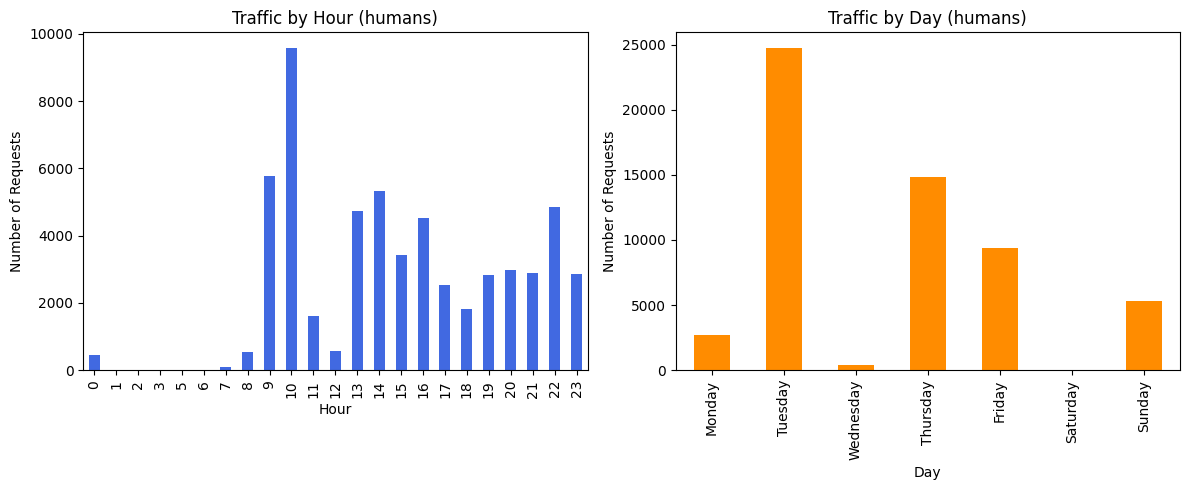

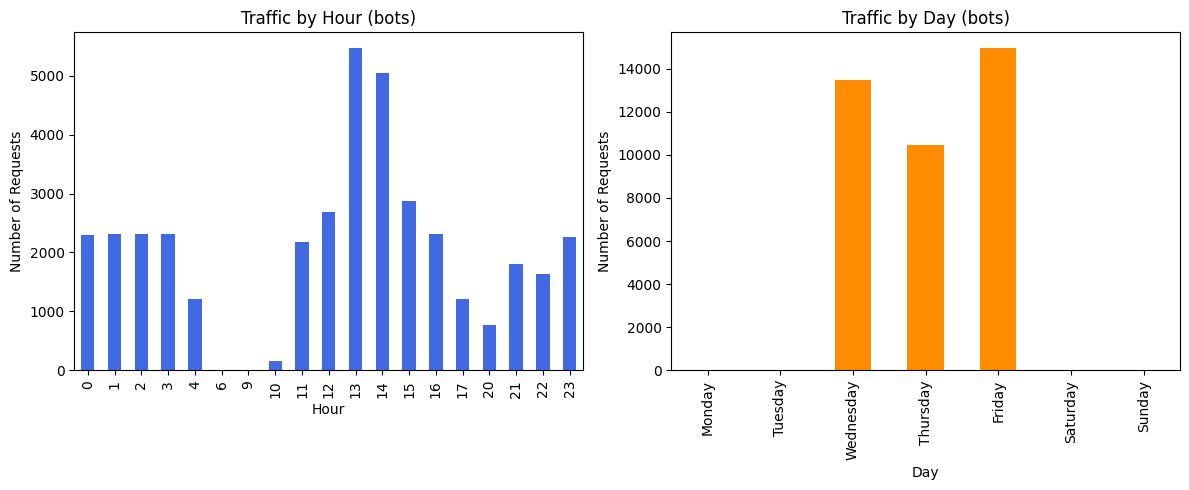


Average Duration per Session:
Humans: 2368.496212121212
Bots: 1410.2880434782608

Average Request Rate:
Humans: 1.0965217574997754
Bots: 0.8067230666561326


In [40]:
# Run analysis for phase 1 data
file_path_1 = "data/interim/web_log_phase1.csv"
df1 = pd.read_csv(file_path_1, parse_dates=["datetime"])
analyze_requests(df1)
compare_humans_bots(df1)

Total Requests: 209138
Unique Sessions: 369
Categories: humans    156786
bots       52352
Name: category, dtype: int64

Average Requests per Session:
Humans: 1224.890625
Bots: 216.3305785123967

Average Duration Between Requests:
Humans: 0 days 00:02:53.917769919
Bots: 0 days 00:00:01.772270197

Request Type Distribution:
Humans: POST       95.80
GET         4.06
OPTIONS     0.08
CONNECT     0.06
HEAD        0.00
Name: method, dtype: float64
Bots: POST       89.29
GET        10.35
OPTIONS     0.36
Name: method, dtype: float64

Referrer Presence:
Humans: 0.9678670289439109
Bots: 0.9917481662591687

Status Distribution:
Humans: 200    97.51
404     2.43
400     0.04
304     0.01
408     0.00
403     0.00
Name: status, dtype: float64
Bots: 200    100.0
Name: status, dtype: float64


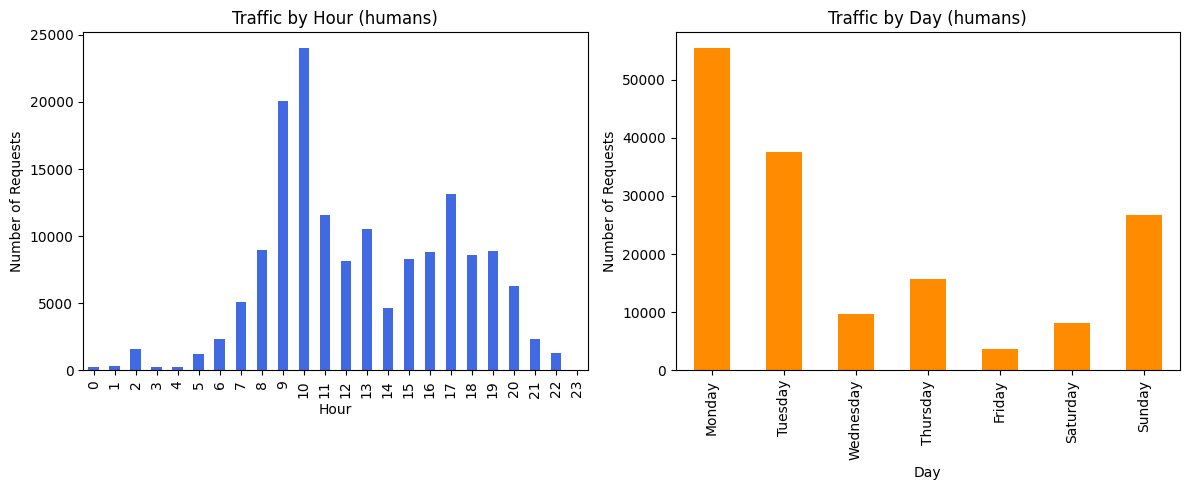

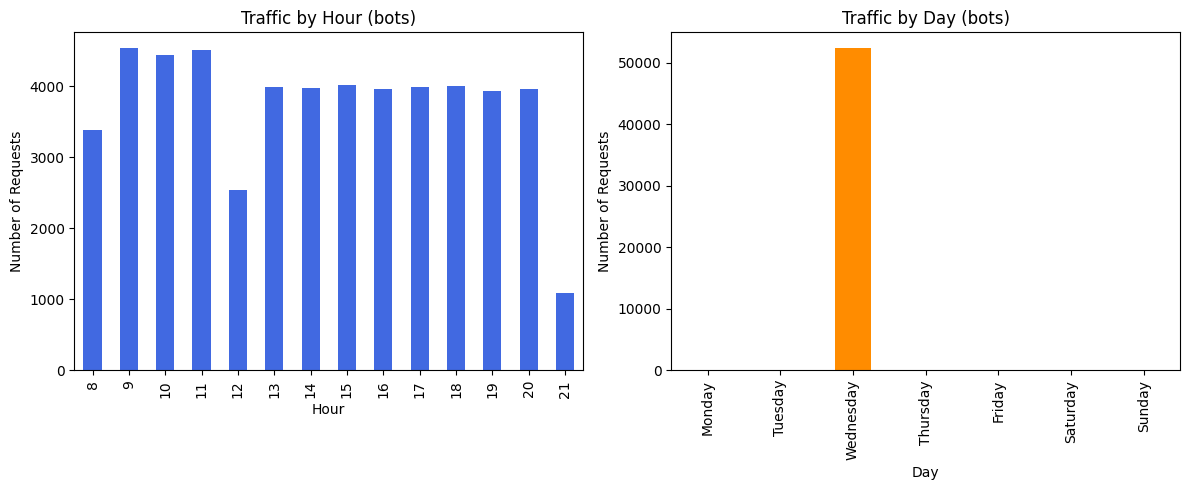


Average Duration per Session:
Humans: 212856.3984375
Bots: 381.62396694214874

Average Request Rate:
Humans: 1.4267790916435212
Bots: 1.2145336319021496


In [39]:
# Run analysis for phase 2 data
file_path_2 = "data/interim/web_log_phase2.csv"
df2 = pd.read_csv(file_path_2, parse_dates=["datetime"])
analyze_requests(df2)
compare_humans_bots(df2)